In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# House prices dataset
house_prices = [150000, 180000, 200000, 220000, 240000, 1000000, 150000]

# Calculate measures of center
mean_price = np.mean(house_prices)
median_price = np.median(house_prices)
mode_price = stats.mode(house_prices, keepdims=True)

# Display results
print(f"Mean Price: ${mean_price:,.2f}")
print(f"Median Price: ${median_price:,.2f}")
print(f"Mode Price: ${mode_price.mode[0]:,.2f}, Count: {mode_price.count[0]}")

Mean Price: $305,714.29
Median Price: $200,000.00
Mode Price: $150,000.00, Count: 2


In [4]:
## A teacher wants to analyze the test scores of students in a class to understand their performance.
## The dataset contains the following scores (out of 100):
test_scores = [65, 65, 67, 70, 72, 75, 80, 82, 85, 90, 95, 100]
mean_score=np.mean(test_scores)
median_score=np.median(test_scores)
mode_score=stats.mode(test_scores, keepdims=True)

print(f"Mean score: {mean_score:,.2f}")
print(f"Median score: {median_score:,.2f}")
print(f"Mode score: {mode_score.mode[0]:,.2f}, Count: {mode_score.count[0]}")



Mean score: 78.83
Median score: 77.50
Mode score: 65.00, Count: 2


Mean --> 789.0833333333334
Median --> 769.5
Ranges --> 1684
Standard deviation (std) --> 425.1862255399261


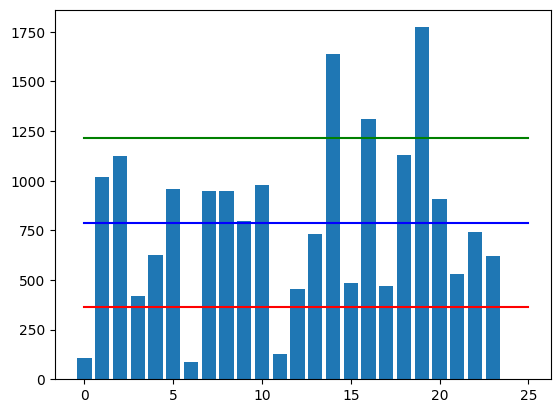

In [5]:
# We take a random sample of 24 of our friends on Facebook and wrote down how many friends that they had on Facebook.

friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981,
           125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621]

print("Mean -->",np.mean(friends))
print("Median -->",np.median(friends))

ranges = np.max(friends) - np.min(friends)
std = np.std(friends) # == 425.2

print("Ranges -->",ranges)
print("Standard deviation (std) -->",std)

import matplotlib.pyplot as plt
%matplotlib inline
y_pos = range(len(friends))
plt.bar(y_pos, friends)
plt.plot((0, 25), (789, 789), 'b-') # the center
plt.plot((0, 25), (789+425, 789+425), 'g-') # the mean plus the standard deviation
plt.plot((0, 25), (789-425, 789-425), 'r-') # the mean minus the standard deviation

# the data lives between the green and the red lines while the outliers live outside the lines.

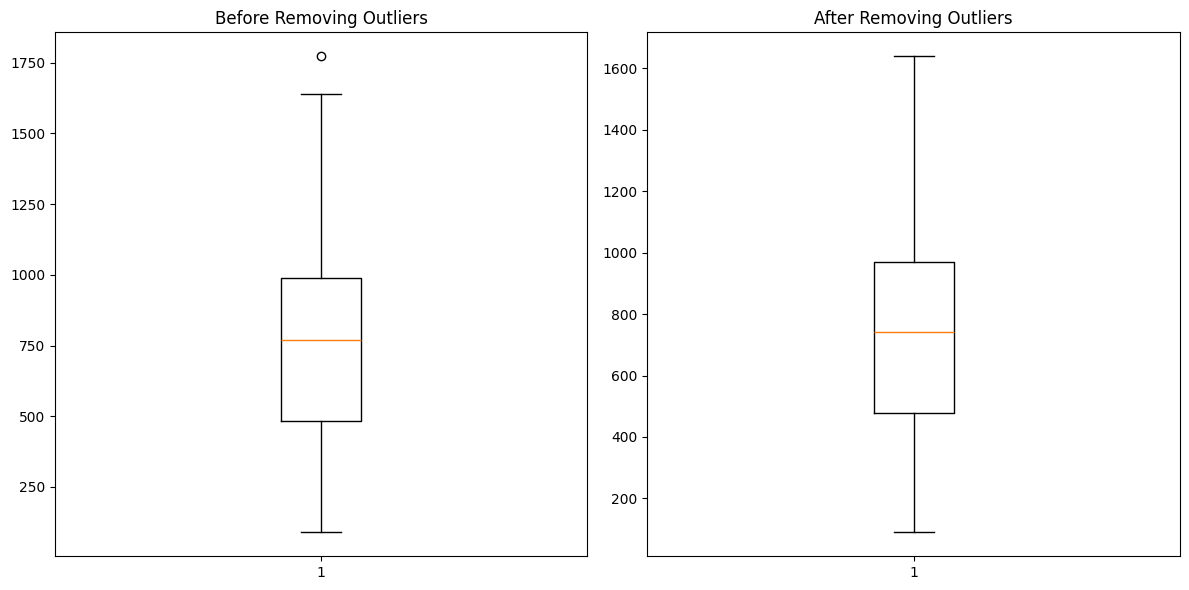

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 
           125, 455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 
           742, 621]

# Step 1: Calculate Q1, Q3, and IQR
Q1 = np.percentile(friends, 25)
Q3 = np.percentile(friends, 75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
filtered_friends = [x for x in friends if lower_bound <= x <= upper_bound]

# Plotting before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Before removing outliers
ax1.boxplot(friends)
ax1.set_title("Before Removing Outliers")

# After removing outliers
ax2.boxplot(filtered_friends)
ax2.set_title("After Removing Outliers")

plt.tight_layout()
plt.show()

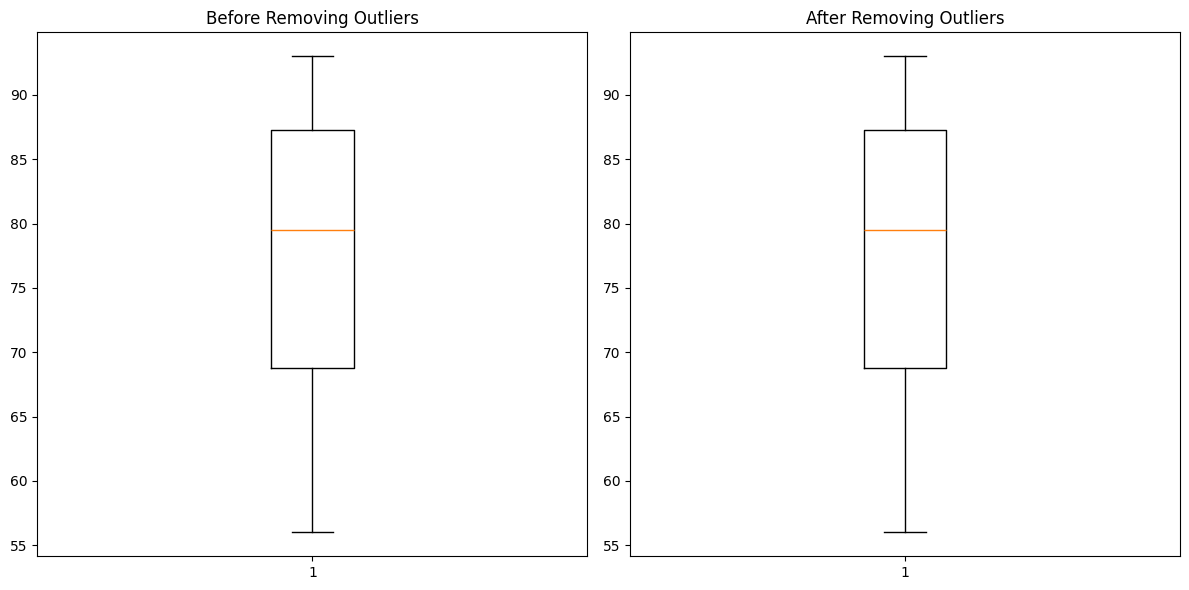

In [15]:
# Question
#Imagine a classroom of students has taken an exam, and their scores are as follows:
##Given data
Scores=[56,78,85,92,61,74,88,93,67,81]

Q1 = np.percentile(Scores, 25)
Q3 = np.percentile(Scores, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_Scores = [x for x in Scores if lower_bound <= x <= upper_bound]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Before removing outliers
ax1.boxplot(Scores)
ax1.set_title("Before Removing Outliers")

# After removing outliers
ax2.boxplot(filtered_Scores)
ax2.set_title("After Removing Outliers")

plt.tight_layout()
plt.show()


<BarContainer object of 24 artists>

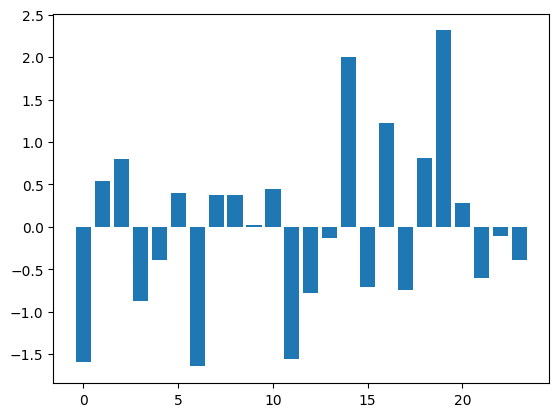

In [16]:
z_scores = []
m = np.mean(friends) # average friends on Facebook
s = np.std(friends) # standard deviation friends on Facebook
for friend in friends:
    z = (friend - m)/s # z-score
    z_scores.append(z) # make a list of the scores for plotting

plt.bar(y_pos, z_scores)

   friends  happiness
0      109        0.8
1     1017        0.6
2     1127        0.3
3      418        0.6
4      625        0.6


<Axes: xlabel='friends_scaled', ylabel='happiness_scaled'>

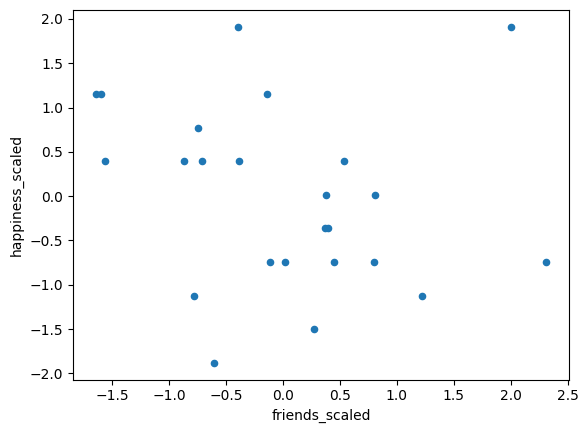

In [17]:
import pandas as pd
from sklearn import preprocessing

happiness = [.8, .6, .3, .6, .6, .4, .8, .5, .4, .3, .3, .6, .2, .8,
1, .6, .2, .7, .5, .3, .1, 0, .3, 1]

df = pd.DataFrame({'friends':friends, 'happiness':happiness})
print(df.head())

## Steps for z score
# Finding the mean of the column
# Finding the standard deviation of the column
# Applying the z-score function to each element in the column
df_scaled = pd.DataFrame(preprocessing.scale(df), columns = ['friends_scaled', 'happiness_scaled'])
df_scaled.head()

df_scaled.plot(kind='scatter', x = 'friends_scaled', y = 'happiness_scaled')

In [23]:
df.corr()

,friends,happiness
friends,1.000000,-0.216199
happiness,-0.216199,1.000000


In [22]:
# finding the percentage of people within one standard deviation ofthe mean
within_1_std = df_scaled[(df_scaled['friends_scaled'] <= 1) & (df_scaled['friends_scaled'] >= -1)].shape[0]
print("within 1 std",within_1_std / float(df_scaled.shape[0]))
# 0.75
# finding the percentage of people within two standard deviations of the mean
within_2_std = df_scaled[(df_scaled['friends_scaled'] <= 2) & (df_scaled['friends_scaled'] >= -2)].shape[0]
print("within 2 std",within_2_std / float(df_scaled.shape[0]))
# 0.916
# finding the percentage of people within three standard deviations of the mean
within_3_std = df_scaled[(df_scaled['friends_scaled'] <= 3) & (df_scaled['friends_scaled'] >= -3)].shape[0]
print("within 3std",within_3_std / float(df_scaled.shape[0]))
# 1.0

within 1 std 0.75
within 2 std 0.9166666666666666
within 3std 1.0


array([[<Axes: title={'center': '0'}>]], dtype=object)

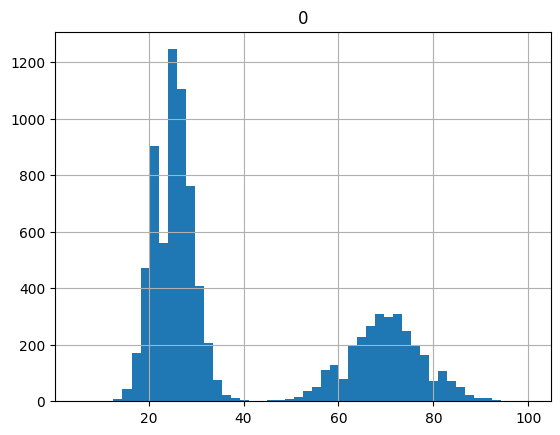

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
np.random.seed(1234)
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)
breaks = np.concatenate((long_breaks, short_breaks))
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

array([[<Axes: title={'center': '0'}>]], dtype=object)

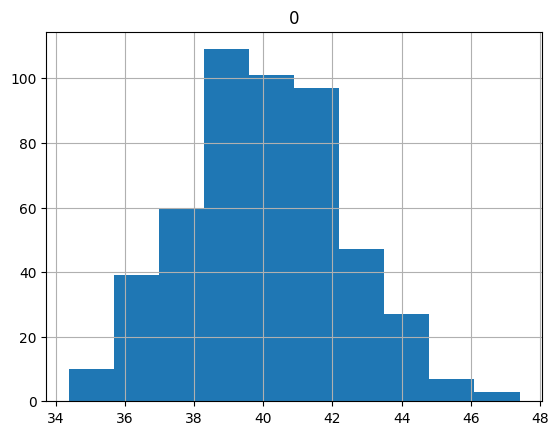

In [7]:
point_estimates = []
for x in range(500): # Generate 500 samples
    sample = np.random.choice(a= breaks, size=100)
#take a sample of 100 points
    point_estimates.append( sample.mean() )
# add the sample mean to our list of point estimates
pd.DataFrame(point_estimates).hist()
# look at the distribution of our sample

array([[<Axes: title={'center': '0'}>]], dtype=object)

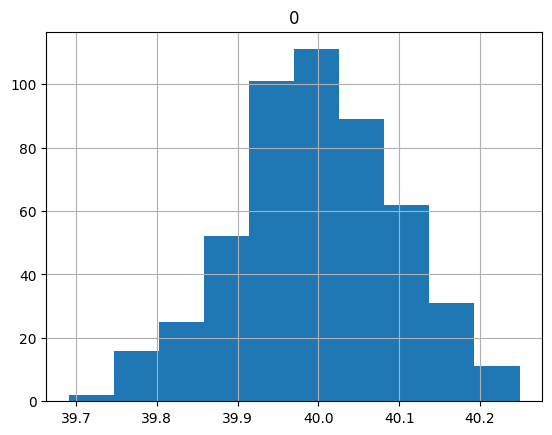

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

population=[]
for x in range(500):
    samp=np.random.choice(a=breaks, size=50000)
    population.append(samp.mean())
pd.DataFrame(population).hist()

In [15]:
import scipy.stats as stats
import numpy as np

# Define the population mean weight
population_mean = 45

# Define the sample mean weight and standard deviation
sample_mean = 75
sample_std = 25

# Define the sample size
sample_size = 25


# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Define the degrees of freedom
df = sample_size - 1

# Set the significance level (alpha)
alpha = 0.05

# Calculate the critical t-value
critical_t = stats.t.ppf(1 - alpha, df)

# Calculate the p-value
p_value = 1 - stats.t.cdf(t_statistic, df)

# Print the results
print("T-Statistic:", t_statistic)
print("Critical t-value:", critical_t)
print("P-Value:", p_value)

# Decision
print('With T-value :')
if t_statistic > critical_t:
    print("""There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.""")
else:
    print("""There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.""")

print('With P-value :')
if p_value >alpha:
    print("""There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.""")
else:
    print("""There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.""")

T-Statistic: 6.0
Critical t-value: 1.7108820799094275
P-Value: 1.703654035845048e-06
With T-value :
There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.
With P-value :
There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.


In [16]:
# import the necessary libraries
from scipy import stats
import numpy as np

# Sample
sample_A = np.array([78,84,92,88,75,80,85,90,87,7978,84,92,88,75,80,85,90,87,79])
sample_B = np.array([82,88,75,90,78,85,88,77,92,8082,88,75,90,78,85,88,77,92,80])

# Perform independent sample t-test
t_statistic, p_value = stats.ttest_ind(sample_A, sample_B)

# Set the significance level (alpha)
alpha = 0.05

# Compute the degrees of freedom (df) (n_A-1)+(n_b-1)
df = len(sample_A)+len(sample_B)-2

# Calculate the critical t-value
# ppf is used to find the critical t-value for a two-tailed test
critical_t = stats.t.ppf(1 - alpha/2, df)


# Print the results
# print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)

# # Decision
# print('With T-value')
# if np.abs(t_statistic) >critical_t:
#     print('There is significant difference between two groups')
# else:
#     print('No significant difference found between two groups')

print('With P-value')
if p_value >alpha:
    print('No evidence to reject the null hypothesis that a significant difference between the two groups')
else:

    print('Evidence found to reject the null hypothesis that a significant difference between the two groups')

P-Value: 0.9934425963209128
Critical t-value: 2.0280940009804502
With P-value
No evidence to reject the null hypothesis that a significant difference between the two groups


In [17]:
group_X = np.array([85, 92, 87, 90, 88, 83, 86, 89, 91, 84])
group_Y = np.array([80, 85, 78, 88, 83, 87, 86, 82, 89, 84])

t_statistic, p_value = stats.ttest_ind(group_X, group_Y)

alpha = 0.05
df = len(group_X)+len(group_Y)-2
critical_t = stats.t.ppf(1 - alpha/2, df)

print("P-Value:", p_value)
print("Critical t-value:", critical_t)



print('With P-value')
if p_value >alpha:
    print('No evidence to reject the null hypothesis that a significant difference between the two groups')
else:

    print('Evidence found to reject the null hypothesis that a significant difference between the two groups')

P-Value: 0.03741242338800086
Critical t-value: 2.10092204024096
With P-value
Evidence found to reject the null hypothesis that a significant difference between the two groups


In [18]:
import numpy as np
from scipy.stats import chi2_contingency

# Define the contingency table
data = np.array([[20, 15, 10],  # Male
                 [25, 20, 30]]) # Female

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between gender and ice cream preference.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between gender and ice cream preference.")

Chi-Square Statistic: 4.0212
P-Value: 0.1339
Degrees of Freedom: 2
Expected Frequencies Table:
[[16.875 13.125 15.   ]
 [28.125 21.875 25.   ]]
Fail to reject the null hypothesis: No significant relationship between gender and ice cream preference.


In [21]:
from scipy.stats import f_oneway

performance_1 = [89, 89, 88, 78, 79]
performance_2 = [93, 92, 94, 89, 88]
performance_3 = [89, 88, 89, 93, 90]
performance_4 = [81, 78, 81, 92, 82]

stats, f_value = f_oneway(performance_1,performance_2,performance_3,performance_4)
alpha = 0.05

if (f_value < alpha):
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis
